# Асимптотика

Математический background: Линейная функция, квадратичная функция, логорифмическая функция, здравый смысл (или теория вероятности).


От чего зависит время работы программы?
- от задачи
- от языка
- от алгоритма
- от реализации
- от входных данных

Немного подробнее:
- от задачи: очевидно, что две разные задачи могут решаться разное время. Например, проигрывание видео и нахождение минимума из 2х чисел. 
- от языка: языки программирования разные. Одна и та же задача, решенная на разных языках, будет почти 100% работать разное время.
- от алгоритма. Пусть есть определенная задача и определенный язык. (Что такое алгоритм?) Есть два алгоритма, оба решают нашу задачу. Определить, какой лучше можно разными путями, но начинать стоит с оценк ассимптотики.
- от реализации. Об этом будет в самом конце.
- от входных данных. Возьмем самую простую задачу, сортировка списка чисел (Есть список чисел, нам нужно получить список, состоящий из тех же чисел, но стоящих в порядке возрастания). Интуитивно должно быть понятно, что чем больше чисел нужно отсортить, тем дольше будет работать алгоритм.

## Асимптотика
асимптотика функции -- это поведение функции при стремлении аргумента к бесконечности.

Пусть у нас есть функция $f$ и функция $g$. Тогда $f = O(g)$, если cуществует такая константа $C$ (возможно очень большая), что начиная с какого-то момента $f \lt C\times g$. Если ничего не понятно - всё в порядке. Если говорить простыми словами $f = O(g)$ значит, что мы можем растянуть график функции $g$ по вертикали (по оси $y$ в $C$ раз и получить график функции $C\times g$) и график $f$ будет лежать ниже полученного графика.

Самые часто используемые функции это 
- $O(n)$ линия
- $O(n^2)$ квадрат
- $O(1)$ константа
- $O(\log(n))$ логорифм
- $O(n \log(n))$ читается как эн-лог-эн

Ниже показаны графики этих функций:

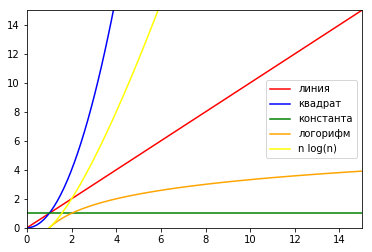

In [1]:
from utils import L004

L004.plot_funcs()

Сразу же можно видеть, какие функции растут быстрее, а какие медленнее. Квадрат, например, растет быстрее логорифма: 
$$\log(n) = O(n^2)$$

$n \log(n)$ растет быстрее линии:
$$n = O(n \log(n))$$

Чтобы оценить асимптотику функции, нужно найти часть, которая растет быстрее всего, а так же убрать все константы.

Попробуем оценить асимптотику функций:
- $3n^2 + 10n$
- $n + \log(n)$
- $n + 100\log(n)$
- $n\sqrt n + \log(n)$
- $n\sqrt n + n + n^2$
- $n\sqrt n + n$
- $N M + M$
- $N M + M$ при M, много меньше N

Подсказки и пример:
- $3n^2$ растет  намного быстрее, чем $10n$, значит $10n$ можно выкинуть. Коэффициент 3 при $n^2$ тоже роли не играет, поэтому ответ: $O(n^2)$
- Если функция зависит не только от одной переменной, ответ может содержать больше чем одну меременную.

Решения:

- $n + \log(n)$ Ответ: $O(n)$
- $n + 100\log(n)$ Ответ: $O(n)$
- $n\sqrt n + \log(n)$ Ответ: $O(n \sqrt n)$
- $n\sqrt n + n + n^2$ Ответ: $O(n^2)$
- $n\sqrt n + n$ Ответ: $O(n \sqrt n)$
- $N M + M$ Ответ: $O(N M)$
- $N M + M$ при M, много меньше N можем считать, что $M$ не играет роли. Тогда ответ $N M$

## Асимптотика в деле

Теперь попробуем оценить асимптотику программ. Для этого будем считать, что простые выражения, условные конструкции, числовые выражение, ввод, вывод будут выполняться за какое-то определенное константное число операций. Возможно, для каждой операции своё. Тогда асимптотика будет $O(1)$.


Если программа не зависит от размера входных данных, тогда асимптотика будет константой: $O(1)$

### Пример 1
```python
A = int(input())
B = int(input())
if A > B:
    print(A)
else:
    print(B)
```

### Пример 2a
```python
N = int(input())
s = 0
for i in range(N + 1):
    s += i
print(s)
```

Чтобы найти асимптотику цикла нужно умножить асимптотику его тела на количество итераций.

s += i выполнится за $O(1)$, всего итераций $N+1$, значит асимптотика этой программы: $O(N)$

Другое решение - выписать сумму количества операций на каждой итерации. В нашем случае это: $ 1 + 1 + \ldots + 1$, $N + 1$ раз. Итого $N + 1$ операций, то есть $O(N)$

Хороша ли программа 2a? Что она делает? Можно ли лучше?

### Пример 2b

Оцените сами:
```python
N = int(input())
print(N * (N + 1) / 2)
```

Что делает 2b? Ответ: то же что и 2a, только быстрее.

Асимптотика позволяет нам сравнивать разные алгоритмы и выбирать лучший.


### Пример 3
```python
N = int(input())
maximum = 0
for i in range(N):
    current = int(input())
    if current > maximum:
        maximum = current
print(current)
```

Ответ в самом низу.

### Пример 4
С вложенными циклами поступать точно так же.

```python
N = int(input())
s = 0
for i in range(N):
    for j in range(N):
        s += i * j
print(s)
```

Ответ в самом низу.

### Пример 5
```python
N = int(input())
M = int(input())
s = 0
for i in range(N):
    for j in range(M):
        s += i * j
print(s)
```

Ответ в самом низу.

### Пример 6
Если асимптотика итераций не постоянна просто умножить асимптотику тела на количество итераций нельзя, но можно прямо выписать количество операций и всё сложить.
```python
N = int(input())
s = 0
for i in range(N):
    for j in range(i, N):
        s += i * j
print(s)
```

Будет $N + (N - 1) + (N - 2) + \ldots + 2 + 1 = \frac{N (N + 1)}{2} = \frac{N^2}{2} + \frac{N}{2} = O(N^2)$

Ответы:
- 3) $O(n)$
- 4) $O(n^2)$
- 5) $O(NM)$

## Сортировка
### Сортировка пузырьком

Описание:
Алгоритм состоит из повторяющихся проходов по сортируемому массиву. За каждый проход элементы последовательно сравниваются попарно и, если порядок в паре неверный, выполняется обмен элементов. Проходы по массиву повторяются N раз. При каждом проходе алгоритма по внутреннему циклу, очередной наибольший элемент массива ставится на своё место в конце массива рядом с предыдущим «наибольшим элементом», а наименьший элемент перемещается на одну позицию к началу массива («всплывает» до нужной позиции, как пузырёк в воде, отсюда и название алгоритма).

In [3]:
def bubble_sort(array):
    for i in range(len(array)):
        for j in range(1, len(array)):
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]

    return array

print(bubble_sort([1, 3, 4, 2, 6, 5, 5, 1, 2]))

[1, 1, 2, 2, 3, 4, 5, 5, 6]


Оцените асимптотику.

Ниже строится график, демонстрирующий её.

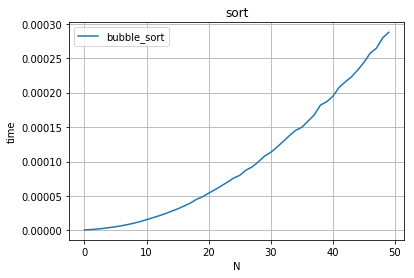

In [4]:
from utils.L003 import compare_functions_time
import random
%matplotlib inline


def data_generator(N):
    x = list(range(N))
    random.shuffle(x)
    return [x]

compare_functions_time(
    [bubble_sort],
    ['bubble_sort'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

In [5]:
def bubble_sort2(array):
    for i in range(len(array)):
        for j in range(1, len(array) - i):
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]

    return array

print(bubble_sort([1, 3, 4, 2, 6, 5, 5, 1, 2]))

[1, 1, 2, 2, 3, 4, 5, 5, 6]


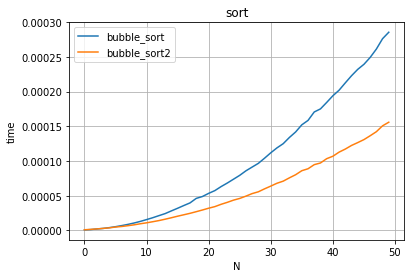

In [6]:
compare_functions_time(
    [bubble_sort, bubble_sort2],
    ['bubble_sort', 'bubble_sort2'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

In [11]:
def bubble_sort3(array):
    for i in range(len(array)):
        is_sorted = True
        for j in range(1, len(array) - i):
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]
                is_sorted = False
        if is_sorted:
            break

    return array

print(bubble_sort([1, 3, 4, 2, 6, 5, 5, 1, 2]))

[1, 1, 2, 2, 3, 4, 5, 5, 6]


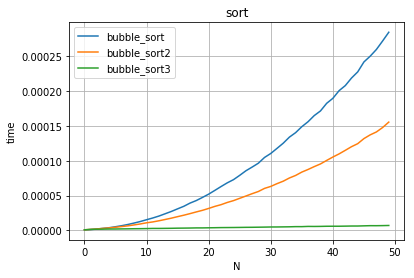

In [14]:
compare_functions_time(
    [bubble_sort, bubble_sort2, bubble_sort3],
    ['bubble_sort', 'bubble_sort2', 'bubble_sort3'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

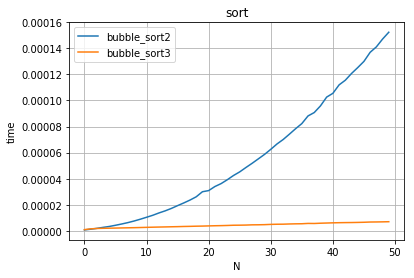

In [15]:
compare_functions_time(
    [bubble_sort2, bubble_sort3],
    ['bubble_sort2', 'bubble_sort3'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 400)
pass

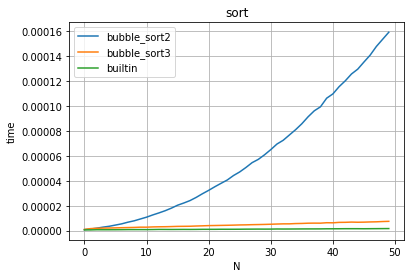

In [16]:
compare_functions_time(
    [bubble_sort2, bubble_sort3, list.sort],
    ['bubble_sort2', 'bubble_sort3', 'builtin'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

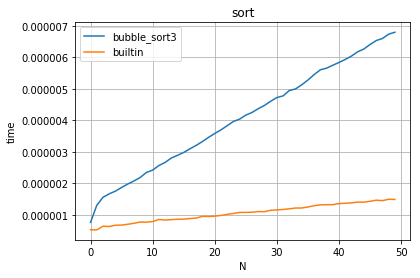

In [17]:
compare_functions_time(
    [bubble_sort3, list.sort],
    ['bubble_sort3', 'builtin'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 800)
pass

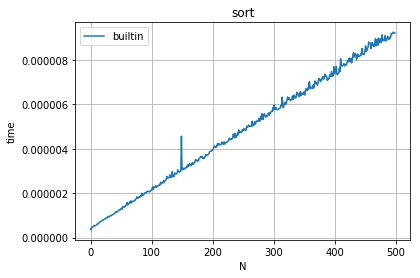

In [19]:
compare_functions_time(
    [list.sort],
    ['builtin'],
    data_generator, 
    range(500),
    'sort', 'N', 'time', 100)
pass